In [2]:
import h5py
import matplotlib.pyplot as plt

In [3]:
file_path = 'data_raw/2872.mat'

with h5py.File(file_path, 'r') as f:
    cjdata = f['cjdata']
    print(cjdata)
    field_names = list(cjdata.keys())
    print(field_names)

    label_data = cjdata['label']
    label_number = int(label_data[0][0])
    print("Label number:", label_number)

    pid_data = cjdata['PID']
    print("PID data:", pid_data)
    pid_string = ''.join(chr(c[0]) for c in pid_data)
    print("Patient ID:", pid_string)


<HDF5 group "/cjdata" (5 members)>
['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
Label number: 2
PID data: <HDF5 dataset "PID": shape (8, 1), type "<u2">
Patient ID: MR049358


In [4]:
file_path = 'data_raw/2872.mat'

with h5py.File(file_path, 'r') as f:
    cjdata = f['cjdata']
    tumor_mask_data = cjdata['tumorMask']
    print("shape:", tumor_mask_data.shape)
    print("type:", tumor_mask_data.dtype)

shape: (512, 512)
type: uint8


In [5]:
file_path = 'data_raw/2872.mat'

with h5py.File(file_path, 'r') as f:
    cjdata = f['cjdata']
    tumor_border_data = cjdata['tumorBorder']
    print("shape:", tumor_border_data.shape)
    print("type:", tumor_border_data.dtype)

shape: (1, 36)
type: float64


In [6]:
file_path = 'data_raw/272.mat'

with h5py.File(file_path, 'r') as f:
    cjdata = f['cjdata']
    image_data = cjdata['image']
    print("shape ", image_data.shape)
    print("type ", image_data.dtype)

    label_data = cjdata['label']
    print("shape :", label_data.shape)
    print("type ", label_data.dtype)

shape  (512, 512)
type  int16
shape : (1, 1)
type  float64


In [7]:
file_path = 'cvind.mat'

with h5py.File(file_path, 'r') as f:
    cvind_indices = f['cvind']
    print(cvind_indices.shape)

(1, 3064)


In [8]:
file_path = 'cvind.mat'

with h5py.File(file_path, 'r') as f:
    cvind_indices = f['cvind']
    cvind_array = cvind_indices[()].flatten()
    print(cvind_array[:100])
    

[5. 5. 5. 5. 5. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 1.
 1. 3. 1. 5. 5. 5. 5. 2. 2. 1. 4. 5. 5. 5. 5. 5. 5. 4. 4. 4. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 4. 4. 5. 3. 1. 1. 2. 2. 2. 2. 2. 1. 1. 1. 1. 4. 4.
 3. 3. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 5. 5. 5. 5. 5. 5.
 5. 5. 4. 4.]


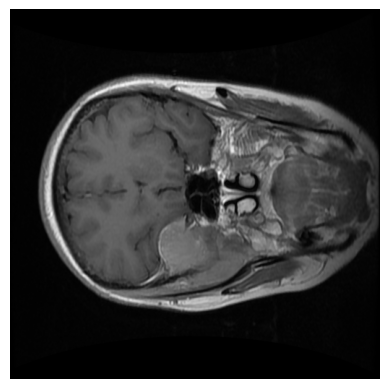

In [9]:
file_path = 'data_raw/354.mat'

with h5py.File(file_path, 'r') as f:
    image = f['cjdata']['image'][()]


plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

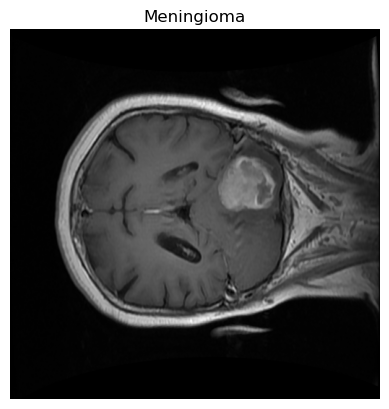

In [20]:
file_path = 'data_raw/344.mat'

label_to_tumor_type = {
    1: 'Meningioma',
    2: 'Glioma',
    3: 'Pituitary'
}

with h5py.File(file_path, 'r') as f:
    image = f['cjdata']['image'][()]
    patient_label = int(f['cjdata']['label'][0][0])

tumor_name = label_to_tumor_type[patient_label]


plt.imshow(image, cmap='gray')
plt.title(tumor_name)
plt.axis('off')
plt.show()

In [11]:
import numpy as np

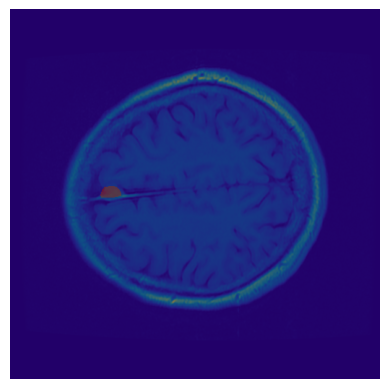

In [ ]:
file_path = 'data_raw/34.mat'

with h5py.File(file_path, 'r') as f:
    image = f['cjdata']['image'][()]
    tumour_mask = f['cjdata']['tumorMask'][()]

plt.imshow(image, cmap='gray')
plt.imshow(tumour_mask, cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

In [13]:
file_path = 'data_raw/3054.mat'

with h5py.File(file_path, 'r') as f:
    border_data = f['cjdata']['tumorBorder'][0]

print(border_data[:10])
print(len(border_data))

[196.2369338  210.5087108  197.12891986 221.21254355 207.83275261
 226.56445993 220.32055749 226.56445993 218.53658537 231.91637631]
56


In [14]:
file_path = 'data_raw/3054.mat'

with h5py.File(file_path, 'r') as f:
    border_data = f['cjdata']['tumorBorder'][0]
    for i in range(0, 10, 2):
        x_position = border_data[i]
        y_position = border_data[i+1]
    
    print(f"(X = {x_position}, Y = {y_position})")

(X = 218.53658536585365, Y = 231.9163763066202)


(X = 258.50203310385575, Y = 125.50878221968942)
(X = 261.3806748978853, Y = 126.66023893730124)


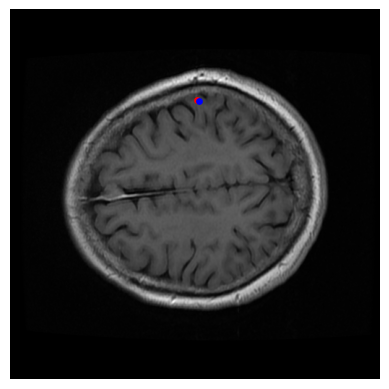

In [15]:
file_path = 'data_raw/34.mat'

with h5py.File(file_path, 'r') as f:
    image = f['cjdata']['image'][()]
    border_data = f['cjdata']['tumorBorder'][0]
    x_position = border_data[0]
    y_position = border_data[1]
    last_x_position = border_data[-2]
    last_y_position = border_data[-1]
    
print(f"(X = {x_position}, Y = {y_position})")
print(f"(X = {last_x_position}, Y = {last_y_position})")

plt.imshow(image, cmap='gray')
plt.scatter(x_position, y_position, c='red', s=15)
plt.scatter(last_x_position, last_y_position, c='blue', s=15)
plt.axis('off')
plt.show()

(X = [258.5020331  251.01756444 246.41173757 245.83600921 245.26028085
 246.41173757 249.86610772 254.47193459 259.07776146 260.22921818
 261.3806749  261.3806749  261.3806749  261.3806749 ], Y = [125.50878222 127.81169565 131.26606581 137.0233494  142.78063298
 147.96218821 151.41655837 154.29520016 154.87092852 149.68937329
 143.35636134 137.0233494  132.99325088 126.66023894])


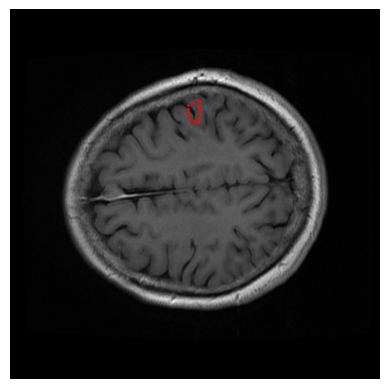

In [16]:
file_path = 'data_raw/34.mat'

with h5py.File(file_path, 'r') as f:
    image = f['cjdata']['image'][()]
    border_data = f['cjdata']['tumorBorder'][0]
    x_positions = border_data[0::2]
    y_positions = border_data[1::2]
    
print(f"(X = {x_positions}, Y = {y_positions})")

plt.imshow(image, cmap='gray')
plt.scatter(x_positions, y_positions, c='red', s=1)
plt.axis('off')
plt.show()

In [17]:
import os

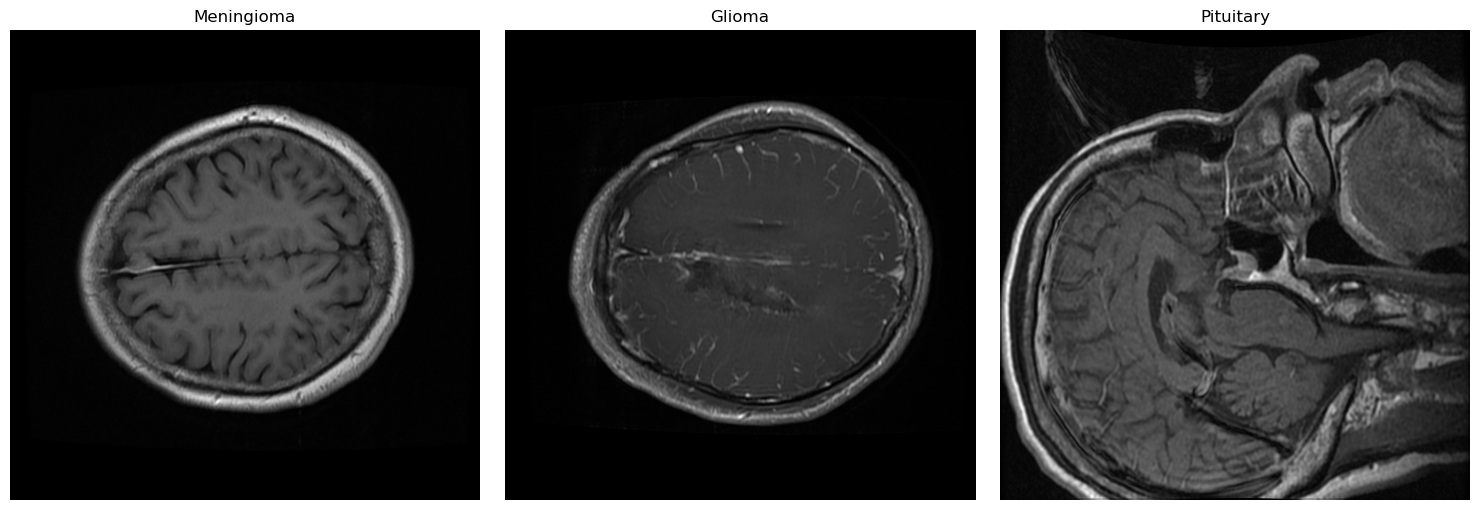

In [18]:
image_1 = 'data_raw/34.mat'
image_2 = 'data_raw/2054.mat'  
image_3 = 'data_raw/1802.mat'

label_names = {1: 'Meningioma', 2: 'Glioma', 3: 'Pituitary'}

with h5py.File(image_1, 'r') as f:
    image_1 = f['cjdata']['image'][()]
    label1_num = int(f['cjdata']['label'][0][0])

with h5py.File(image_2, 'r') as f:
    image_2 = f['cjdata']['image'][()]
    label2_num = int(f['cjdata']['label'][0][0])

with h5py.File(image_3, 'r') as f:
    image_3 = f['cjdata']['image'][()]
    label3_num = int(f['cjdata']['label'][0][0])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_1, cmap='gray')
axes[0].set_title(label_names[label1_num]) # Use the label number to get the name
axes[0].axis('off')

axes[1].imshow(image_2, cmap='gray')
axes[1].set_title(label_names[label2_num])
axes[1].axis('off')

axes[2].imshow(image_3, cmap='gray')
axes[2].set_title(label_names[label3_num])
axes[2].axis('off')

plt.tight_layout()
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

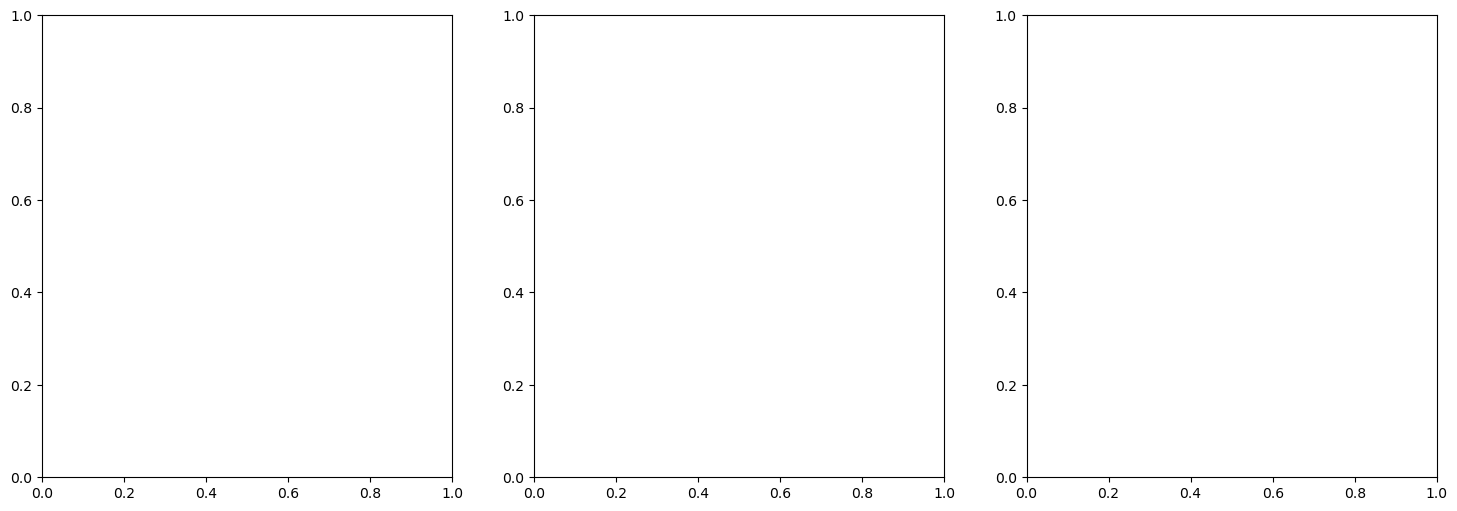

In [ ]:
meningioma_1 = 'data_raw/34.mat'
meningioma_2 = 'data_raw/2054.mat'  
meningioma_3 = 'data_raw/1802.mat'

label_names = {1: 'Meningioma', 2: 'Glioma', 3: 'Pituitary'}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

with h5py.File(meningioma_1, 'r') as f:
    meningioma_1 = f['cjdata']['image'][()]
    label1_num = int(f['cjdata']['label'][0][0])
    border1 = f['cjdata']['tumorBorder'][0]

    meningioma_2 = f['cjdata']['image'][()]
    label2_num = int(f['cjdata']['label'][0][0])
    border2 = f['cjdata']['tumorBorder'][1]

    meningioma_3 = f['cjdata']['image'][()]
    label3_num = int(f['cjdata']['label'][0][0])
    border3 = f['cjdata']['tumorBorder'][0]

axes[0].imshow(meningioma_1, cmap='gray')
axes[0].set_title(label_names[label1_num]) # Use the label number to get the name
axes[0].scatter(border1[0::2], border1[1::2], c='red', s=1)
axes[0].axis('off')

axes[1].imshow(meningioma_2, cmap='gray')
axes[1].set_title(label_names[label2_num]) # Use the label number to get the name
axes[1].scatter(border1[0::2], border1[1::2], c='red', s=1)
axes[1].axis('off')
plt.show()

